In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt

%matplotlib inline

### Gaussian Elimination Operations:

1. Swap two rows
2. Multiply one row by a scalar value
3. Add a scalar multiple of one row to another

### Elementary Matrices Operations:

1. Permutation Matrix
2. Scaling Matrix
3. Row Combination Matrix

### Problem 1.
Write a function which reduces a square matrix A to REF. You may assume that A is invertible and that a 0
will never appear on the main diagonal (so only use type III row reductions, not type II). Avoid operating on entries that you know will be 0 before and after a row operation. Consider generating small random matrices as test cases with NumPy’s random module (np.random.randint() may be particularly useful).

In [2]:
def gen_inv_sq_mat(size = 3):
    """
    Create a random invertible matrix
    """
    try:
        A = np.random.randint(1, 10, size=(size,size))
        np.linalg.inv(A)
        return A.astype(float)
    except:
        return gen_inv_sq_mat(size = size)

In [3]:
A = gen_inv_sq_mat()

In [4]:
A 

array([[ 2.,  2.,  9.],
       [ 2.,  8.,  1.],
       [ 5.,  7.,  4.]])

In [5]:
def ref(A):
    """
    Reduces the square matrix A to its REF.
    """
    A_ = A.copy()
    for i in range(len(A_)):
        if A_[i,i]==0:
            print("Encountered zero leading term")
            return A_
        A_[i+1:,] = A_[i+1:,] - (A_[i+1:,i]/A_[i,i])[:, None]*A_[i,None]
    return A_

In [6]:
ref(A)

array([[  2.        ,   2.        ,   9.        ],
       [  0.        ,   6.        ,  -8.        ],
       [  0.        ,   0.        , -15.83333333]])

### Problem 2

Problem 2. Write a function that finds the LU decomposition of a square matrix. You may assume the decomposition exists and requires no row swaps.

In [7]:
def lu_decomposition(A):
    m,n = A.shape
    U = np.copy(A)
    L = np.eye(m)
    for j in range(n):
        for i in range(j+1, m):
            L[i,j] = U[i,j]/U[j,j]
            U[i,j:] = U[i,j:] - L[i,j]*U[j,j:]
    return L,U

In [8]:
L,U = lu_decomposition(A)

In [9]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 2.5       ,  0.33333333,  1.        ]])

In [10]:
U

array([[  2.        ,   2.        ,   9.        ],
       [  0.        ,   6.        ,  -8.        ],
       [  0.        ,   0.        , -15.83333333]])

In [11]:
np.dot(L,U)

array([[ 2.,  2.,  9.],
       [ 2.,  8.,  1.],
       [ 5.,  7.,  4.]])

### Problem 3.
Write a function that, given $A$ and $b$, solves the square linear system $Ax = b$. Use the function from Problem 2 to compute $L$ and $U$, then use Equations 2.1 and 2.2 to solve for $y$, then $x$. You may again assume that there are no row swaps (so $P = I$ in this case).

In [12]:
A = gen_inv_sq_mat()
A

array([[ 1.,  9.,  7.],
       [ 6.,  8.,  3.],
       [ 5.,  1.,  5.]])

In [13]:
b = np.random.randint(1, 10, size = (len(A),1))
b

array([[5],
       [7],
       [4]])

In [14]:
def solve(A,b):
    L,U = lu_decomposition(A)
    #solve for Ly = b
    y = np.zeros(shape=(len(b),1))
    for i in range(len(y)):
        y[i] = b[i]-np.sum([L[i,j]*y[j] for j in range(i)])
    
    #solve for Ux = y
    x = np.zeros(shape=(len(b),1))
    for i in range(len(x)-1,-1,-1):
        x[i] = (1./U[i,i])*(y[i] - np.sum([U[i,j]*x[j] for j in range(i+1, len(x))]))
    
    return x

In [15]:
x = solve(A,b)
x

array([[ 0.58630952],
       [ 0.38392857],
       [ 0.13690476]])

In [16]:
np.dot(A,x)

array([[ 5.],
       [ 7.],
       [ 4.]])

### Problem 4. 

Write a function that times different `scipy.linalg` functions for solving square linear systems.
For various values of $n$, generate a random $n × n$ matrix $A$ and a random $n × 1$ vector $b$ using `np.random.random()`. Time how long it takes to solve the system $Ax = b$ with each of the following approaches:
1. Invert $A$ with `la.inv()` and left-multiply the inverse to $b$.
2. Use `la.solve()`.
3. Use `la.lu_factor()` and `la.lu_solve()` to solve the system with the LU decomposition.
4. Use `la.lu_factor()` and `la.lu_solve()`, but only time `la.lu_solve()`.

Plot the system size $n$ versus the execution times. Use log scales if needed.

In [17]:
n = 2**np.arange(0, 13, 2)

In [18]:
def method1(A,b):
    A_inv = la.inv(A)
    return np.dot(A_inv, b)

def method2(A,b):
    return la.solve(A, b)

def method3(A,b):
    lu, piv = la.lu_factor(A)
    return la.lu_solve((lu,piv), b)

In [19]:
m1_times = []
m2_times = []
m3_times = []
m4_times = []
for i in n:
    A = np.random.random(size=(i,i))
    b = np.random.random(size=(i,1))
    
    #method1
    start = time.time()
    method1(A,b)
    m1_times.append(time.time()-start)
    
    #method2
    start = time.time()
    method2(A,b)
    m2_times.append(time.time()-start)
    
    #method3
    start = time.time()
    method3(A,b)
    m3_times.append(time.time()-start)
    
    #method4
    (lu,piv) = la.lu_factor(A)
    start = time.time()
    la.lu_solve((lu,piv), b)
    m4_times.append(time.time()-start)
    

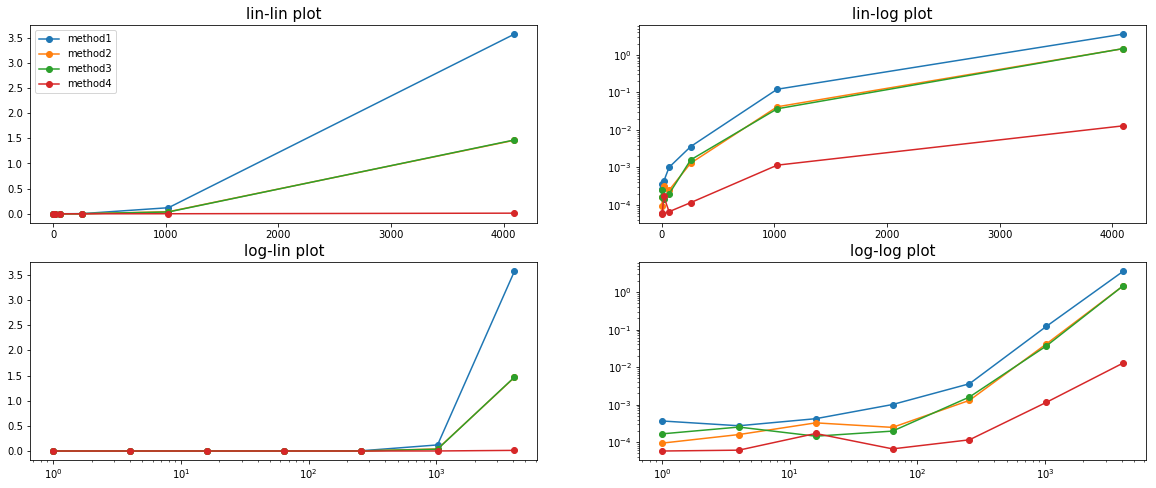

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,8))
ax = ax.flatten()
ax[0].plot(n,m1_times, 'o-', label="method1")
ax[0].plot(n,m2_times, 'o-', label="method2")
ax[0].plot(n,m3_times, 'o-', label="method3")
ax[0].plot(n,m4_times, 'o-', label="method4")
ax[0].set_title("lin-lin plot", size = 15)
ax[0].legend(loc=0)

ax[1].semilogy(n,m1_times, 'o-', label="method1")
ax[1].semilogy(n,m2_times, 'o-', label="method2")
ax[1].semilogy(n,m3_times, 'o-', label="method3")
ax[1].semilogy(n,m4_times, 'o-', label="method4")
ax[1].set_title("lin-log plot", size = 15)

ax[2].semilogx(n,m1_times, 'o-', label="method1")
ax[2].semilogx(n,m2_times, 'o-', label="method2")
ax[2].semilogx(n,m3_times, 'o-', label="method3")
ax[2].semilogx(n,m4_times, 'o-', label="method4")
ax[2].set_title("log-lin plot", size = 15)

ax[3].loglog(n,m1_times, 'o-', label="method1")
ax[3].loglog(n,m2_times, 'o-', label="method2")
ax[3].loglog(n,m3_times, 'o-', label="method3")
ax[3].loglog(n,m4_times, 'o-', label="method4")
ax[3].set_title("log-log plot", size = 15)

### Problem 5

Write a function that accepts an integer $n$ and returns a sparse $n × n$ tri-diagonal array $A$ with 2’s along the main diagonal and −1’s along the first subdiagonal and the first superdiagonal.


In [21]:
def tri_diag(n):
    val, offsets = [-1,2,-1], [-1,0,1]
    return sp.sparse.diags(val, offsets, shape=(n,n))

In [22]:
A = tri_diag(10)

In [23]:
A.toarray()

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

### Problem 6. 
Write a function that times regular and sparse linear system solvers.
For various values of $n$, generate the $n×n$ matrix $A$ described in Problem 5 and a random $n × 1$ vector b. Time how long it takes to solve the system $Ax = b$ with each of the following approaches:

1. Convert A to CSR format, then use scipy.sparse.linalg.spsolve().
2. Convert A to a NumPy array, then use scipy.linalg.solve().

Plot the system size $n$ versus the execution times. As always, use log scales where appropriate and use a legend to label each line.

In [24]:
n = 2**np.arange(4,13,2)
n

array([  16,   64,  256, 1024, 4096])

In [25]:
sparse_times = []
naive_times = []
for i in n:
    A = tri_diag(i)
    b = np.random.random(size=(i,1))
    
    #csr format
    A_csr = A.tocsr()
    start = time.time()
    x_csr = spla.spsolve(A_csr, b)
    sparse_times.append(time.time()-start)
    
    
    #numpy's ndarray format
    A_npy = A.toarray()
    start = time.time()
    x_npy = la.solve(A_npy, b)
    naive_times.append(time.time()-start)
    

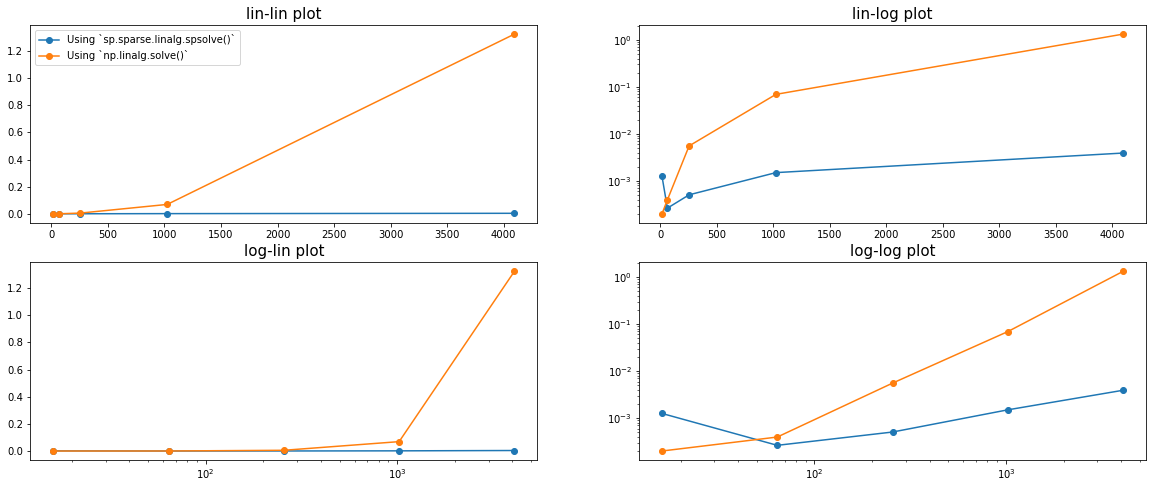

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,8))
ax = ax.flatten()
ax[0].plot(n,sparse_times, 'o-', label="Using `sp.sparse.linalg.spsolve()`")
ax[0].plot(n,naive_times, 'o-', label="Using `np.linalg.solve()`")
ax[0].set_title("lin-lin plot", size = 15)
ax[0].legend(loc=0)

ax[1].semilogy(n,sparse_times, 'o-')
ax[1].semilogy(n,naive_times, 'o-')
ax[1].set_title("lin-log plot", size = 15)

ax[2].semilogx(n,sparse_times, 'o-')
ax[2].semilogx(n,naive_times, 'o-')
ax[2].set_title("log-lin plot", size = 15)

ax[3].loglog(n,sparse_times, 'o-')
ax[3].loglog(n,naive_times, 'o-')
ax[3].set_title("log-log plot", size = 15)

### Additonal Exercises

### Fast LU Decomposition

In [27]:
def fast_LU(A):
    m,n  = A.shape
    U = A.copy()
    L = np.eye(m)
    
    for k in range(n):
        L[k+1:,k] = U[k+1:,k]/U[k,k]
        U[k+1:,k:] = U[k+1:, k:] - L[k+1:,k, None]*U[k,k:].T
    return L,U

In [28]:
A = gen_inv_sq_mat()
A

array([[ 2.,  5.,  6.],
       [ 8.,  4.,  8.],
       [ 9.,  1.,  5.]])

In [29]:
L,U = lu_decomposition(A)

In [30]:
L

array([[ 1.     ,  0.     ,  0.     ],
       [ 4.     ,  1.     ,  0.     ],
       [ 4.5    ,  1.34375,  1.     ]])

In [31]:
U

array([[  2. ,   5. ,   6. ],
       [  0. , -16. , -16. ],
       [  0. ,   0. ,  -0.5]])

In [32]:
fast_LU(A)

(array([[ 1.     ,  0.     ,  0.     ],
        [ 4.     ,  1.     ,  0.     ],
        [ 4.5    ,  1.34375,  1.     ]]), array([[  2. ,   5. ,   6. ],
        [  0. , -16. , -16. ],
        [  0. ,   0. ,  -0.5]]))

### LU Decomposition with Pivoting

In [33]:
def pivot_LU(A):
    m,n = A.shape
    U = np.copy(A)
    L = np.eye(m)
    P = np.arange(n)
    for k in range(n):
        i = k+np.argmax(np.abs(U[k:,k]))
        U[k,k:],U[i,k:] = U[i,k:].copy(),U[k,k:].copy()
        L[k,:k],L[i,:k] = L[i,:k].copy(),L[k,:k].copy()
        P[k],P[i] = P[i].copy(), P[k].copy()
        L[k+1:,k] = U[k+1:,k]/U[k,k]
        U[k+1:,k:] = U[k+1:,k:] - L[k+1:,k,None]*U[k,k:].T
    return L,U,P

In [34]:
L,U,P = pivot_LU(A)

In [35]:
A[P]

array([[ 9.,  1.,  5.],
       [ 2.,  5.,  6.],
       [ 8.,  4.,  8.]])

In [36]:
np.dot(L,U)

array([[ 9.,  1.,  5.],
       [ 2.,  5.,  6.],
       [ 8.,  4.,  8.]])

### Inverse

In [37]:
A

array([[ 2.,  5.,  6.],
       [ 8.,  4.,  8.],
       [ 9.,  1.,  5.]])

In [38]:
def inverse_LU(A):
    L,U,P = pivot_LU(A)
    P = np.eye(len(A))[P]
    
    #solve for LUA_inv = P

    #first solve for LB = P where B = UA_inv
    B = np.zeros(L.shape)
    for i in range(len(B)):
        B[i] = P[i] - np.dot(L[i, :i+1],B[:i+1]) 

    #now solve for UA_inv = B
    A_inv = np.zeros(A.shape)
    for i in range(len(A_inv)-1, -1, -1):
        A_inv[i] = (1/U[i,i])*(B[i] - np.dot(U[i, i+1:],A_inv[i+1:]))
    
    return A_inv

In [39]:
A_inv = inverse_LU(A)

In [40]:
np.dot(A,A_inv)

array([[  1.00000000e+00,  -2.66453526e-15,   1.77635684e-15],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -6.66133815e-16,   1.33226763e-15,   1.00000000e+00]])

### Determinant

$det(A) = \frac{det(L)det(U)}{det(P)}$



In [41]:
def determinant_LU(A):
    L,U,P = pivot_LU(A)
    det = np.product(np.diag(U))
    if count_swaps(P)%2==0:
        return det
    else:
        return -det

In [42]:
def count_swaps(P):
    not_ar = P[P!=np.arange(len(P))]
    i = 0
    count = 0
    while (not_ar!=np.sort(not_ar)).any():
        for j in range(len(not_ar[i:])):
            if not_ar[i]>not_ar[i+j]:
                not_ar[i],not_ar[i+j]=not_ar[i+j],not_ar[i]
                count+=1
        i+=1
    return count

In [43]:
A = gen_inv_sq_mat(8)

In [44]:
sp.linalg.det(A)

1298340.9999999988

In [45]:
determinant_LU(A)

1298340.9999999991

### Cholesky Decomposition

In [46]:
def cholesky(A):
    U = A.copy()
    for i in range(len(U)):
        for j in range(i+1, len(U)):
            U[j,j:] = U[j,j:] - U[i,j:]*np.conjugate(U[i,j])/U[i,i]
        U[i,i:] = U[i,i:]/np.sqrt(U[i,i])
    return U

In [47]:
A = np.array([[4, 12, -16],
              [12, 37, -43],
              [-16, -43, 98]])

In [48]:
U = cholesky(A)
U

array([[  2,   6,  -8],
       [ 12,   1,   5],
       [-16, -43,   3]])